### Code installing and data generation

In [17]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from math import log, floor, pow

class Analysis():
    def computeLogReturns(self, back, ahead):
        return np.divide(back, ahead).map(log)
    
    def generateGaussians(self, mean=100, std=1, n=1000):
        return np.random.normal(mean, std, n)
    
    def leadingDigit(self, x):
        absx = abs(x)
        return floor(float(absx) / pow(10, floor(log(absx))))
    

analysis = Analysis()

#Problem 1 Stuff
GSPCdata = pd.read_csv('./data/GSPC_historical_prices.csv')
GSPCvalues = GSPCdata['Adj Close']

gaussians = analysis.generateGaussians()
gaussianRets = analysis.computeLogReturns(pd.Series(gaussians[:-1]), pd.Series(gaussians[1:]))

times = pd.to_datetime(GSPCdata['Date'])
timesOffByOne = times[1:]

logRets = analysis.computeLogReturns(GSPCvalues[:-1], GSPCvalues[1:])

#Problem 2 stuff
popData = pd.read_csv('./data/PEP_2014_PEPANNRSIP.US12A_with_ann.csv')
citiesAndPopulation = popData[['GC_RANK.display-label.1', 'respop72014']]
population = popData['respop72014']
logXs = pd.Series(xrange(1, len(population))).map(log)
logPops = population[1:len(population)].map(log)

## Problem 1

Here is a plot of the price values. We see a steady increase since 1953.

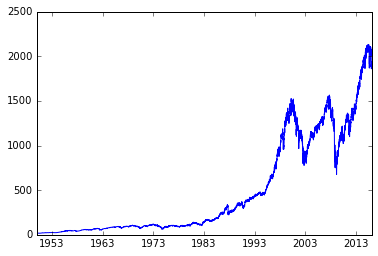

In [18]:
plt.plot(times, GSPCvalues)

Here is a plot of the Log returns. We see the characteristic large fluctuations signalling
the possibility of a power law for the distribution of returns.

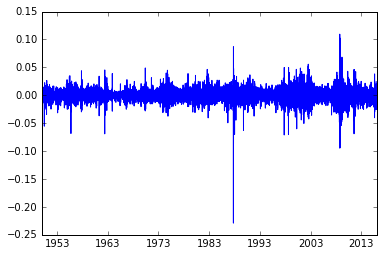

In [19]:
plt.plot(timesOffByOne, logRets)

Below is a plot of Gaussian distributed fluctuations. We see random jumps near the mean, but at far
lower orders of magnitude compared to above.

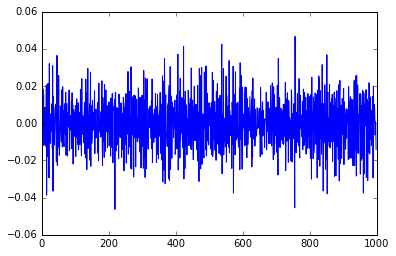

In [20]:
plt.plot(gaussianRets)

## Problem 2

Zipf's law ( $ r^{b} f = a $ ) is applicable to power law relationships between ranks and outcomes. We discussed power laws and emergence in physical systems with no natural pressure to reduce outcomes. In real world systems like city populations or incomes we see these power law relationships. By applying a log transform to the Zipf's law formula, we have 

$ \log f = \log a + b \log r $

allowing us to apply a linear curve fit and find coefficients $ b $ and $ a $. Below is a plot for population data.


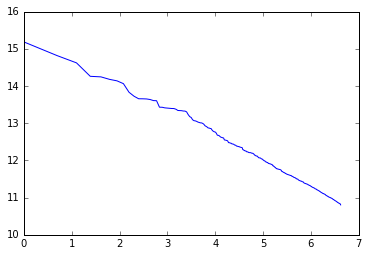

In [21]:

plt.plot(logXs, logPops)


Here there are 752 cities, ranked using a log transform on the population and rank. We see a visible linear relationship that suggests the rank and population are power law related. Curve fitting we find...

In [22]:
slope, intercept, r_value, p_value, std_err = stats.linregress(logXs, logPops)
print slope
print pow(10,intercept)

-0.706898904192
3.41240882218e+15
